# VeloCity Sports Analysis

- By Brunda Anantha

#### Questions need to answer:
    
- Which users are most likely to purchase virtual merchandise? 
- How do user activities during race events correlate with their merchandise purchases and sponsorship interaction? 

###  Importing Libraries

In [1]:
#### import libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

### Loading Dataset from Github

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Brunda08/VeloCity/refs/heads/main/2025-VeloCityX-Expanded-Fan-Engagement-Data%20(1).csv')
df

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
0,U001,5,80,3,10,120,20
1,U002,8,60,1,8,100,35
2,U003,3,90,0,6,90,5
3,U004,7,70,2,15,140,40
4,U005,2,50,5,3,60,8
...,...,...,...,...,...,...,...
95,U096,8,86,6,14,98,22
96,U097,3,82,3,1,159,24
97,U098,1,91,1,9,92,34
98,U099,8,93,0,1,160,40


### Missing Values

In [3]:
# Checking for missing values in each column and summing them up.
missing_values_per_column = df.isna().sum()

# Printing the total count of missing values for each column.
print(missing_values_per_column)

# Calculating and printing the total count of missing values across the entire dataset.
total_missing_values = df.isnull().sum().sum()
print('Total missing values: %s ' % total_missing_values)

# Calculating the percentage of observations containing at least one missing value.
# This is done by counting the rows with at least one missing value and dividing it by the total number of rows.
percentage_missing = len(df[df.isnull().any(axis=1)]) / len(df) * 100

# Displaying the percentage of observations with at least one missing value.
print('Percentage of observations with missing values: %.2f%%' % percentage_missing)

User ID                                    0
Fan Challenges Completed                   0
Predictive Accuracy (%)                    0
Virtual Merchandise Purchases              0
Sponsorship Interactions (Ad Clicks)       0
Time on Live 360 (mins)                    0
Real-Time Chat Activity (Messages Sent)    0
dtype: int64
Total missing values: 0 
Percentage of observations with missing values: 0.00%


The examination of missing values in the dataset reveals that there are no missing values present in any of the columns. Every attribute in the dataset has complete data.

### Summary Stats

In [4]:
# Display data summary
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   User ID                                  100 non-null    object
 1   Fan Challenges Completed                 100 non-null    int64 
 2   Predictive Accuracy (%)                  100 non-null    int64 
 3   Virtual Merchandise Purchases            100 non-null    int64 
 4   Sponsorship Interactions (Ad Clicks)     100 non-null    int64 
 5   Time on Live 360 (mins)                  100 non-null    int64 
 6   Real-Time Chat Activity (Messages Sent)  100 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 5.6+ KB
None
       Fan Challenges Completed  Predictive Accuracy (%)  \
count                100.000000               100.000000   
mean                   5.790000                74.990000   
std                    2.825908          

**Insights from Initial Data Analysis:**
- The average predictive accuracy of users in challenges is approximately 75%, indicating a good general knowledge among participants.
- Users purchase an average of 2.67 virtual merchandise items, with considerable variability (standard deviation of 2.06).
- Sponsorship interactions show significant differences, with a high standard deviation, suggesting varied user responses to ads.

## EDA

### Adding Features

In [5]:

# Create derived feature - User Engagement Score
df['Engagement_Score'] = df['Fan Challenges Completed'] * 0.4 + df['Real-Time Chat Activity (Messages Sent)'] * 0.3 + df['Time on Live 360 (mins)'] * 0.3
df.head(2)

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent),Engagement_Score
0,U001,5,80,3,10,120,20,44.0
1,U002,8,60,1,8,100,35,43.7


### Engagement Score Distribution

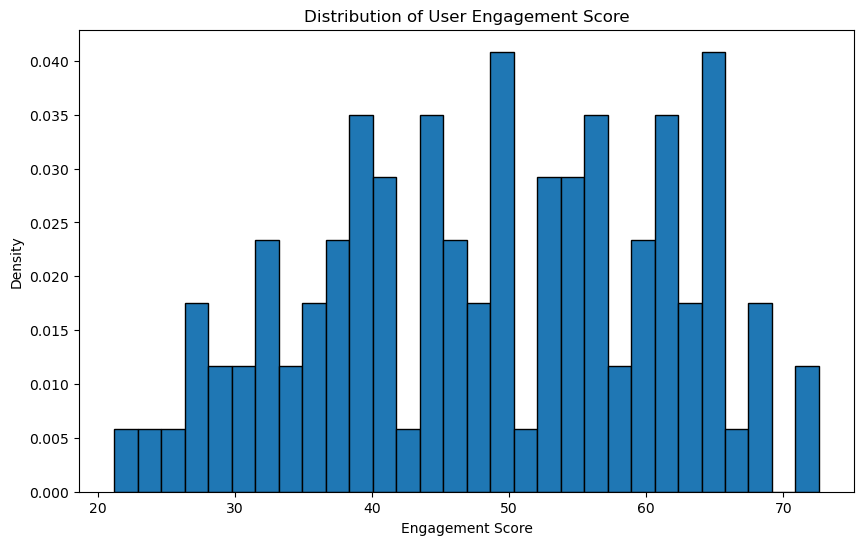

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(df['Engagement_Score'].dropna(), bins=30, edgecolor='black', density=True)
plt.title('Distribution of User Engagement Score')
plt.xlabel('Engagement Score')
plt.ylabel('Density')
plt.show()

### Correlation Matrix

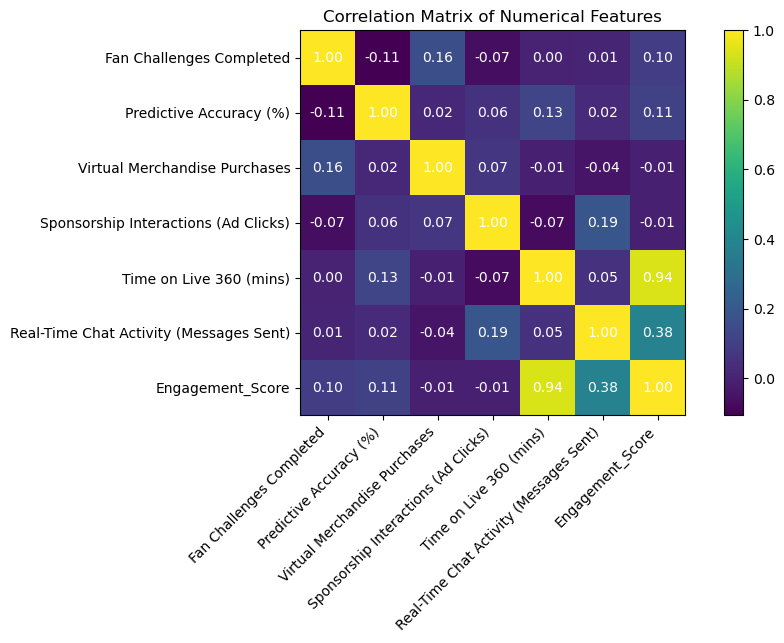

In [7]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot correlation heatmap using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(corr_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.xticks(ticks=range(len(corr_matrix.columns)), labels=corr_matrix.columns, rotation=45, ha='right')
plt.yticks(ticks=range(len(corr_matrix.index)), labels=corr_matrix.index)
plt.title('Correlation Matrix of Numerical Features')

# Adding the correlation values on the heatmap
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.index)):
        plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}", ha="center", va="center", color="white")

plt.show()

**Insights from Plots:**
- The distribution of the `Engagement_Score` is relatively uniform, indicating that user engagement is spread across different levels without a significant concentration.
- `Time on Live 360 (mins)` shows a strong positive correlation with `Engagement_Score` (0.94), suggesting that users who spend more time on live coverage tend to have higher overall engagement.
- `Real-Time Chat Activity` also correlates moderately with `Engagement_Score` (0.38), implying that chat activity is an important factor in user engagement, though not as strongly as live coverage time.


### Standardizing and Scaling features

In [8]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Selecting the features to scale
features_to_scale = ['Fan Challenges Completed', 'Predictive Accuracy (%)',
                     'Virtual Merchandise Purchases', 'Sponsorship Interactions (Ad Clicks)',
                     'Time on Live 360 (mins)', 'Real-Time Chat Activity (Messages Sent)', 'Engagement_Score']

# Option 1: Standardize the features (mean = 0, std = 1)
scaler = StandardScaler()
df_scaled_standardized = pd.DataFrame(scaler.fit_transform(df[features_to_scale]),
                                      columns=features_to_scale)

# Option 2: Normalize/scale the features (range [0, 1])
min_max_scaler = MinMaxScaler()
df_scaled_normalized = pd.DataFrame(min_max_scaler.fit_transform(df[features_to_scale]),
                                    columns=features_to_scale)

# Merging the scaled features back into the original dataframe if necessary
df_standardized = df.copy()  # To keep original data intact
df_standardized[features_to_scale] = df_scaled_standardized

df_normalized = df.copy()  # To keep original data intact
df_normalized[features_to_scale] = df_scaled_normalized



Standardizing and scaling features is essential for clustering and predictive modeling because many algorithms (like K-Means, Logistic Regression, and Decision Trees) are sensitive to the magnitude of the data.

StandardScaler: Standardizes the features by subtracting the mean and dividing by the standard deviation.

MinMaxScaler: Normalizes the features by scaling them into a range (default is 0 to 1).

Merging back: After scaling, you can merge the transformed data back into the original DataFrame or use the scaled DataFrame for further analysis.

### Clustering

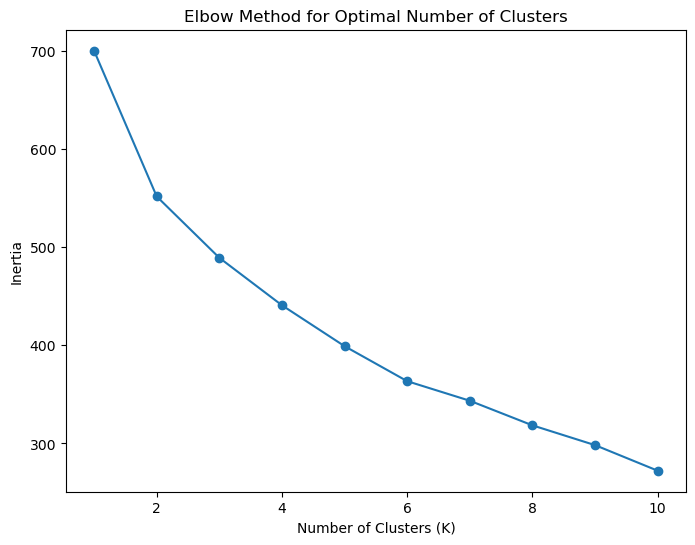

In [9]:
# Use the elbow method to find the optimal number of clusters
k_values = range(1, 11)
inertia_values = []

# Calculate inertia for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_standardized[features_to_scale])
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


In [10]:
# Based on the elbow plot, we choose 3 clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Fit the model on the standardized data
df_standardized['Cluster'] = kmeans.fit_predict(df_standardized[features_to_scale])


# Optionally, you can add the cluster labels back to the original data
df['Cluster'] = df_standardized['Cluster']

# Analyze clusters
for cluster in range(optimal_k):
    print(f"Cluster {cluster} Summary:")
    print(df[df['Cluster'] == cluster].describe())
    print("\n")

Cluster 0 Summary:
       Fan Challenges Completed  Predictive Accuracy (%)  \
count                 23.000000                23.000000   
mean                   4.913043                71.043478   
std                    2.810905                14.389005   
min                    1.000000                50.000000   
25%                    2.000000                59.000000   
50%                    5.000000                74.000000   
75%                    7.000000                83.500000   
max                   10.000000                93.000000   

       Virtual Merchandise Purchases  Sponsorship Interactions (Ad Clicks)  \
count                      23.000000                             23.000000   
mean                        2.173913                             15.086957   
std                         1.749082                              3.476062   
min                         0.000000                              7.000000   
25%                         1.000000              

#### Clustering Insights

- Cluster 0 contains 23 users who generally show moderate engagement and high sponsorship interactions.
- Cluster 1 has 40 users who display moderate challenge completion and lower engagement.
- Cluster 2 consists of 37 users with high fan challenges completed and high predictive accuracy but lower sponsorship interactions.

## Predictive Modelling

In [11]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Define features with the added Engagement Score and standardize them
X = df[['Fan Challenges Completed', 'Predictive Accuracy (%)', 'Sponsorship Interactions (Ad Clicks)', 
        'Time on Live 360 (mins)', 'Real-Time Chat Activity (Messages Sent)', 'Engagement_Score','Cluster']]
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Add a constant for the intercept in the OLS model
X_standardized = sm.add_constant(X_standardized)

# The target variable 'Virtual Merchandise Purchases' was chosen as it aligns with the objective of optimizing merchandise sales, a key aspect of improving fan engagement and driving monetization strategies.
# Define the target variable
y = df['Virtual Merchandise Purchases']

# Fit the OLS model
ols_model = sm.OLS(y, X_standardized).fit()

# Retrieve the summary of the model
ols_summary = ols_model.summary()

ols_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Virtual Merchandise Purchases   R-squared:                       0.065
Model:                                       OLS   Adj. R-squared:                  0.005
Method:                            Least Squares   F-statistic:                     1.081
Date:                           Sat, 12 Oct 2024   Prob (F-statistic):              0.379
Time:                                   19:41:05   Log-Likelihood:                -210.53
No. Observations:                            100   AIC:                             435.1
Df Residuals:                                 93   BIC:                             453.3
Df Model:                                      6                                         
Covariance Type:                       nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6700      0.206     12.962      0.000       2.261       3.079
x1             0.2519      0.215      1.171      0.245      -0.175       0.679
x2            -0.0720      0.227     -0.317      0.752      -0.523       0.379
x3             0.4717      0.271      1.739      0.085      -0.067       1.010
x4            -0.0652      0.132     -0.492      0.624      -0.328       0.198
x5             0.0117      0.220      0.053      0.958      -0.425       0.448
x6            -0.0334      0.103     -0.324      0.747      -0.238       0.171
x7             0.5206      0.312      1.668      0.099      -0.099       1.140
==============================================================================
Omnibus:                       20.842   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.022
Skew:                           0.266   Prob(JB):                       0.0492
Kurtosis:                       1.921   Cond. No.                     6.22e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.51e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Key Findings for Virtual Merchandise Purchases:
- R-squared: 0.065, indicating that the model explains about 6.5% of the variance in merchandise purchases, which is quite low. This suggests that the included features do not strongly explain or predict merchandise purchases.

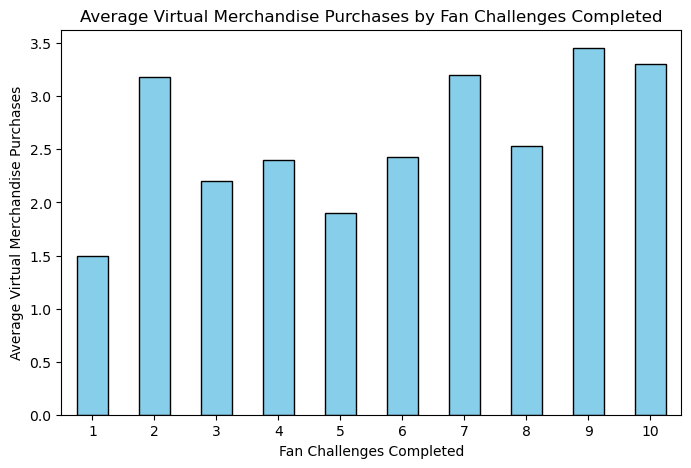

<Figure size 800x500 with 0 Axes>

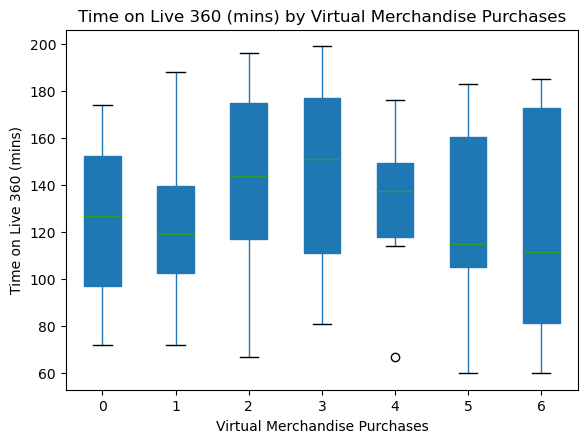

In [12]:

# Visualization 1: Bar plot showing average virtual merchandise purchases by Fan Challenges Completed
plt.figure(figsize=(8, 5))
df.groupby('Fan Challenges Completed')['Virtual Merchandise Purchases'].mean().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Virtual Merchandise Purchases by Fan Challenges Completed')
plt.xlabel('Fan Challenges Completed')
plt.ylabel('Average Virtual Merchandise Purchases')
plt.xticks(rotation=0)
plt.show()



# Visualization 2: Box plot of Time on Live 360 by Virtual Merchandise Purchases
plt.figure(figsize=(8, 5))
df.boxplot(column='Time on Live 360 (mins)', by='Virtual Merchandise Purchases', grid=False, patch_artist=True)
plt.title('Time on Live 360 (mins) by Virtual Merchandise Purchases')
plt.suptitle('')
plt.xlabel('Virtual Merchandise Purchases')
plt.ylabel('Time on Live 360 (mins)')
plt.show()


### Answers to Questions

#### 1. Which users are most likely to purchase virtual merchandise?
Challenge Participants: Users who complete more Fan Challenges are somewhat more likely to buy virtual merchandise. Although the effect is small, it suggests that people who engage in challenges might be open to buying items.
Ad Clickers: There is a slight positive connection between Sponsorship Interactions (Ad Clicks) and merchandise purchases. Users who click on more ads may also be a bit more likely to make purchases, showing that ad engagement could hint at buying interest.

#### 2. How do user activities during race events relate to merchandise purchases and ad interactions?
Live Coverage & Chat Activity: Neither Time on Live 360 nor Real-Time Chat Activity shows a strong link to merchandise purchases. This means that just spending time on live events or chatting doesn’t seem to make users more likely to buy merchandise.
Sponsorship Interactions: There’s a moderate connection between Real-Time Chat Activity and Sponsorship Interactions. This implies that chat-active users also tend to engage with sponsored content more often, though this doesn’t lead directly to higher merchandise purchases.

### Recommendations

#### Promote Merchandise with Challenges:
Since users who complete more challenges tend to buy a bit more merchandise, consider promoting items as rewards for completing challenges. This could encourage both more challenge participation and more merchandise purchases.

#### Targeted Ads for Frequent Ad Clickers:
Since users who click on ads are slightly more likely to buy merchandise, target these users with merchandise ads. Offering in-app promotions or discounts on merchandise to these users might help increase sales.

#### Collect More Data on Buying Patterns:
The current data doesn’t strongly predict merchandise purchases. Collecting more information, like user demographics, overall app usage, or responses to promotions, might give better insights into who buys merchandise and why.

#### Encourage Social Engagement with Group Features:
Users active in chat also tend to click on ads. To build on this, consider adding social features, like group challenges or leaderboards, that tie into merchandise rewards. This could drive both social engagement and increase merchandise sales.